In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys, copy, emcee, corner

%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind as lb

In [2]:
sim = lb.WymSim(sets=1,reps=1)

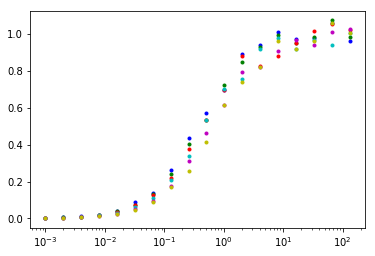

In [3]:
lb.semlog(sim.ligs,sim.meanset[0],'.')

In [4]:
def klotz1(k1,lig):
    return (k1*lig)/(1 + k1*lig)

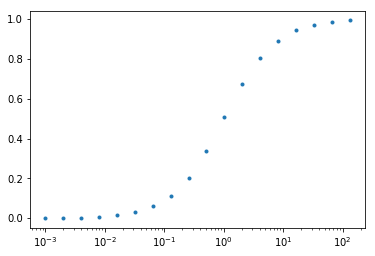

In [5]:
plt.semilogx(sim.ligs[0],klotz1(1.,sim.ligs[0]),'.')

In [33]:
def klotz2(parms,lig):
    k1 = parms[0]
    k2 = parms[1]
    return (1/2)*((k1*lig + 2*k1*k2*(lig**2))/(1 + k1*lig + k1*k2*(lig**2)))

In [34]:
klotz2(np.array([1.,10.]),sim.ligs[0])

array([  5.09485420e-04,   1.03788272e-03,   2.15105163e-03,
         4.60025381e-03,   1.03675778e-02,   2.51765428e-02,
         6.60295395e-02,   1.76368591e-01,   4.09844299e-01,
         6.96136874e-01,   8.79134372e-01,   9.55013265e-01,
         9.82368066e-01,   9.92508974e-01,   9.96597746e-01,
         9.98386064e-01,   9.99214994e-01,   9.99613007e-01])

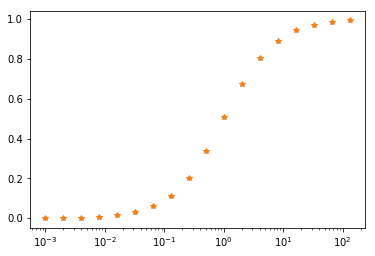

In [8]:
plt.semilogx(sim.ligs[0],klotz1(1.,sim.ligs[0]),'.')
plt.semilogx(sim.ligs[0],klotz2(2.,0.5,sim.ligs[0]),'*')

In [19]:
klotz1(1.,sim.ligs[0]) - klotz2(2.,0.5,sim.ligs[0])

array([  2.16840434e-19,  -4.33680869e-19,  -8.67361738e-19,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.93889390e-18,  -1.38777878e-17,   2.77555756e-17,
         5.55111512e-17,   0.00000000e+00,  -1.11022302e-16,
         0.00000000e+00,   1.11022302e-16,  -1.11022302e-16,
         1.11022302e-16,   1.11022302e-16,   0.00000000e+00])

In [9]:
def ls_obj_k1(k1,ligs,data):
    return(data - klotz1(k1,ligs))

In [14]:
ligs = sim.ligs[0]
dat = klotz1(1.,ligs)

In [15]:
dat

array([ 0.000999  ,  0.00199601,  0.00398406,  0.00793651,  0.01574803,
        0.03100775,  0.06015038,  0.11347518,  0.20382166,  0.33862434,
        0.50592885,  0.67191601,  0.80376766,  0.89120975,  0.94247584,
        0.97038616,  0.98497054,  0.99242837])

In [23]:
datnoise = np.abs(np.random.normal(dat,0.05*dat))

In [28]:
ls_obj_k1(1.,ligs,datnoise)

array([  6.67082692e-06,   7.63323427e-06,  -2.73581986e-04,
         4.78324750e-04,  -1.60919508e-03,   2.60573301e-03,
         2.27012248e-03,  -1.83740613e-03,   1.68593032e-02,
         2.48160058e-04,  -3.54288079e-02,   9.94560838e-03,
        -5.60563821e-02,   5.13118039e-02,  -3.89789861e-02,
         1.74140897e-03,   3.33191538e-02,  -8.78180336e-02])

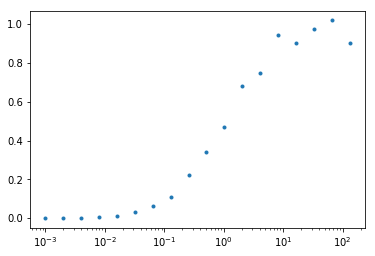

In [27]:
plt.semilogx(ligs,datnoise,'.')

In [30]:
sp.optimize.least_squares(ls_obj_k1,1.,args=(ligs,datnoise))

 active_mask: array([ 0.])
        cost: 0.0086776496708916573
         fun: array([  4.79493450e-05,   9.00289659e-05,  -1.09432910e-04,
         8.04075789e-04,  -9.67705161e-04,   3.85002474e-03,
         4.61409654e-03,   2.34291009e-03,   2.36281017e-02,
         9.64249644e-03,  -2.48694563e-02,   1.93236957e-02,
        -4.93086435e-02,   5.54752674e-02,  -3.66457295e-02,
         2.97964440e-03,   3.39574225e-02,  -8.74939440e-02])
        grad: array([ -9.57228474e-09])
         jac: array([[-0.00099809],
       [-0.00199235],
       [-0.0039695 ],
       [-0.00787869],
       [-0.01552024],
       [-0.03012349],
       [-0.05681464],
       [-0.10154952],
       [-0.16504937],
       [-0.23036538],
       [-0.26076359],
       [-0.23322758],
       [-0.16875894],
       [-0.10451798],
       [-0.05870241],
       [-0.03119024],
       [-0.01608763],
       [-0.00817133]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 4
        njev: 4
  optimality: 

In [35]:
def ls_obj_k2(parms,ligs,data):
    return(data - klotz2(parms,ligs))

In [36]:
ls_obj_k2(np.array([2.,0.5]),ligs,datnoise)

array([  6.67082692e-06,   7.63323427e-06,  -2.73581986e-04,
         4.78324750e-04,  -1.60919508e-03,   2.60573301e-03,
         2.27012248e-03,  -1.83740613e-03,   1.68593032e-02,
         2.48160058e-04,  -3.54288079e-02,   9.94560838e-03,
        -5.60563821e-02,   5.13118039e-02,  -3.89789861e-02,
         1.74140897e-03,   3.33191538e-02,  -8.78180336e-02])

In [40]:
np.sum(np.square(sp.optimize.least_squares(ls_obj_k2,np.array([1.,1.]),args=(ligs,datnoise)).fun))

0.016960421220272724

In [42]:
datnoise.shape

(18,)

In [43]:
datset = (ligs,datnoise)

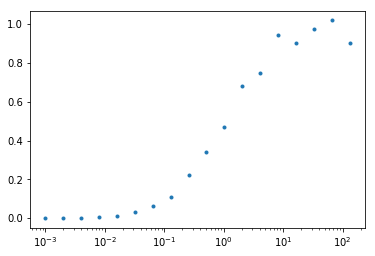

In [45]:
plt.semilogx(datset[0],datset[1],'.')

In [47]:
fit_klotz1 = sp.optimize.least_squares(ls_obj_k1,1.,args=(datset[0],datset[1]),ftol=1e-14)

In [49]:
fit_klotz2 = sp.optimize.least_squares(ls_obj_k2,np.array([1.,1.]),args=(datset[0],datset[1]),ftol=1e-14)

In [50]:
fit_klotz1.x

array([ 0.95864059])

In [51]:
fit_klotz2.x

array([ 2.09694958,  0.43890226])

In [53]:
(fit_klotz1.x*2, fit_klotz1.x/2)

(array([ 1.91728119]), array([ 0.4793203]))

In [56]:
SSnull = np.sum(np.square(fit_klotz1.fun))

In [57]:
SSalt = np.sum(np.square(fit_klotz2.fun))

In [58]:
DFnull = 17
DFalt = 16

In [59]:
((SSnull-SSalt)/SSalt)/((DFnull-DFalt)/DFalt)

0.37251727785024097

In [60]:
((SSnull-SSalt)/(DFnull-DFalt))/(SSalt-DFalt)

-2.4706071680812243e-05

In [61]:
DFnull

17

In [62]:
DFalt

16

In [63]:
SSnull

0.017355299341783315

In [64]:
SSalt

0.016960421220272724

In [65]:
SSnull-SSalt

0.00039487812151059107

In [70]:
(SSnull-SSalt)/(SSalt/DFalt)

0.37251727785024097

In [74]:
from scipy import stats

In [80]:
stats.f.sf(0.372517277,1,16)

0.55020704311728008

In [82]:
lb.dilser()

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [114]:
def k1mod(params,ligs,noise=None):
    '''
    returns tuple of ligand concentrations, saturation, params
    
    params is array of binding constants
    ligs is array of ligand concentrations
    noise is relative percent of gaussian noise (e.g., 0.0-1.) applied to data
    '''
    
    k1 = params[0]
    sat = (k1*ligs)/(1 + k1*ligs)
    
    if noise is None:
        return (ligs,sat)
    else:
        noised = np.random.normal(sat,noise*sat)
        return (ligs,noised,params)

In [106]:
ligset = lb.dilser()

In [107]:
k1mod(np.array([1]),ligset,0.05)

(array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02]),
 array([  9.51713629e-04,   1.91152792e-03,   4.11128184e-03,
          7.00564112e-03,   1.68193518e-02,   3.17893718e-02,
          5.98707723e-02,   1.03105691e-01,   1.93125927e-01,
          3.07959581e-01,   4.98864446e-01,   6.73099526e-01,
          8.26889350e-01,   8.71622949e-01,   9.56594420e-01,
          1.06377323e+00,   9.97044548e-01,   9.89505321e-01]),
 array([1]))

In [113]:
def k2mod(params,ligs,noise=None):
    '''
    returns tuple of ligand concentrations, saturation, params
    
    params is array of binding constants
    ligs is array of ligand concentrations
    noise is relative percent of gaussian noise (e.g., 0.0-1.) applied to data
    '''
    
    k1 = params[0]
    k2 = params[1]
    sat = (1/2)*((k1*ligs + 2*k1*k2*(ligs**2))/(1 + k1*ligs + k1*k2*(ligs**2)))
    
    if noise is None:
        return (ligs,sat)
    else:
        noised = np.random.normal(sat,noise*sat)
        return (ligs,noised,params)

In [104]:
k2mod(np.array([2.,.5]),ligset,0.05)

(array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
          8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
          6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
          5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
          4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
          3.27680000e+01,   6.55360000e+01,   1.31072000e+02]),
 array([  1.00886791e-03,   1.95514968e-03,   3.88070916e-03,
          7.43906188e-03,   1.61043270e-02,   3.11128474e-02,
          6.55123009e-02,   1.10057927e-01,   1.98768641e-01,
          3.44796484e-01,   4.85458363e-01,   7.25403013e-01,
          7.11380627e-01,   9.12044309e-01,   1.01303476e+00,
          1.05459346e+00,   9.90490385e-01,   9.52146157e-01]),
 array([ 2. ,  0.5]))

In [100]:
k2mod(np.array([2.,.5]),ligset)[1] - k1mod(np.array([1.]),ligset)[1]

array([ -2.16840434e-19,   4.33680869e-19,   8.67361738e-19,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -6.93889390e-18,   1.38777878e-17,  -2.77555756e-17,
        -5.55111512e-17,   0.00000000e+00,   1.11022302e-16,
         0.00000000e+00,  -1.11022302e-16,   1.11022302e-16,
        -1.11022302e-16,  -1.11022302e-16,   0.00000000e+00])

In [125]:
def obj(guess,model,data):
    return model(guess,data[0])[1] - data[1]

In [126]:
datk2 = k2mod(np.array([2.,.5]),ligset,0.05)

In [127]:
obj(datk2[2],k2mod,datk2)

array([  1.81407676e-06,  -6.24778130e-06,   3.53775447e-07,
        -4.81135428e-04,  -2.08601617e-04,   5.44025369e-04,
        -2.47046544e-03,  -7.82293460e-03,  -8.01826058e-03,
         2.54745177e-04,   2.39861586e-02,  -1.76201271e-02,
         6.98322502e-02,   5.61857622e-02,  -9.00549070e-02,
        -3.31911854e-02,   5.22744113e-02,   5.50557843e-02])

In [135]:
def fit(data,model,guess):
        return sp.optimize.least_squares(obj,guess,args=(model,data),ftol=1e-14,gtol=1e-14,xtol=1e-14)

In [136]:
fit(datk2,k2mod,np.array([1.,1.]))

 active_mask: array([ 0.,  0.])
        cost: 0.011207819861956984
         fun: array([  9.56318745e-05,   1.80414352e-04,   3.69814295e-04,
         2.42567995e-04,   1.17978035e-03,   3.09864501e-03,
         1.85019218e-03,  -1.68808816e-03,  -2.26530488e-03,
        -1.59097422e-04,   1.19017928e-02,  -3.89487265e-02,
         4.79886012e-02,   3.98373067e-02,  -1.00218333e-01,
        -3.88855445e-02,   4.92563550e-02,   5.35015699e-02])
        grad: array([  1.01165842e-09,   6.89328726e-10])
         jac: array([[  4.98229108e-04,   2.18143396e-06],
       [  9.92934250e-04,   8.69727228e-06],
       [  1.97187814e-03,   3.45623121e-05],
       [  3.88862771e-03,   1.36461225e-04],
       [  7.56320314e-03,   5.31933736e-04],
       [  1.43188930e-02,   2.02240888e-03],
       [  2.57545774e-02,   7.33238645e-03],
       [  4.22028181e-02,   2.43785167e-02],
       [  5.91251158e-02,   7.00023379e-02],
       [  6.55441260e-02,   1.61044125e-01],
       [  5.38582555e-02,   2.

In [137]:
fit(datk2,k1mod,np.array([1.]))

 active_mask: array([ 0.])
        cost: 0.011716870898387395
         fun: array([ -4.72477083e-05,  -1.04180394e-04,  -1.94750956e-04,
        -8.68329379e-04,  -9.71135370e-04,  -9.35230296e-04,
        -5.25769625e-03,  -1.27958525e-02,  -1.60762031e-02,
        -1.09408358e-02,   1.13851098e-02,  -2.88268100e-02,
         6.17599186e-02,   5.12013295e-02,  -9.28494608e-02,
        -3.46745793e-02,   5.15096765e-02,   5.46674551e-02])
        grad: array([  1.31511605e-09])
         jac: array([[ 0.0009981 ],
       [ 0.00199241],
       [ 0.00396975],
       [ 0.00787967],
       [ 0.01552406],
       [ 0.03013808],
       [ 0.05686811],
       [ 0.10173033],
       [ 0.16557978],
       [ 0.23160426],
       [ 0.26287791],
       [ 0.23576199],
       [ 0.17096867],
       [ 0.1060428 ],
       [ 0.05961067],
       [ 0.03168788],
       [ 0.01634838],
       [ 0.00830484]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 1

In [138]:
fittest = fit(datk2,k1mod,np.array([1.]))

In [143]:
fittest.x.shape[0]

1

In [157]:
def ftest(fit1,fit2):
    '''
    fit1 is fit from simpler model
    '''
    
    SS1 = np.sum(np.square(fit1.fun))
    SS2 = np.sum(np.square(fit2.fun))
    
    DF1 = fit1.fun.shape[0] - fit1.x.shape[0]
    DF2 = fit2.fun.shape[0] - fit2.x.shape[0]
    
    F = ((SS1-SS2)/(DF1-DF2))/(SS2/DF2)
    
    p = sp.stats.f.sf(F,(DF1-DF2),DF2)
    
    print(SS1,SS2,DF1,DF2,F,p)
        

In [147]:
fita = fit(datk2,k1mod,np.array([1.]))
fitb = fit(datk2,k2mod,np.array([1.,1.]))

In [148]:
fita.x

array([ 0.95084246])

In [149]:
fitb.x

array([ 2.18861412,  0.41326878])

In [158]:
ftest(fita,fitb)

0.0234337417968 0.0224156397239 17 16 0.726708377116 0.406532384267


In [155]:
import scipy as sp

In [156]:
sp.stats

<module 'scipy.stats' from '/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/scipy/stats/__init__.py'>

In [168]:
datk2 = k1mod(np.array([12.]),ligset,0.1)
fita = fit(datk2,k1mod,np.array([1.]))
fitb = fit(datk2,k2mod,np.array([1.,1.]))

In [169]:
ftest(fita,fitb)

0.0989169112123 0.0988749242103 17 16 0.00679436205554 0.935328826885


In [170]:
fita.x

array([ 11.98436145])

In [171]:
fitb.x

array([ 23.27031876,   6.18266542])

In [172]:
fitb.x[0]/fitb.x[1]

3.7638004289605109

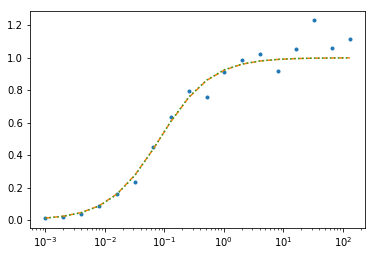

In [179]:
pfita = k1mod(fita.x,ligs)
pfitb = k2mod(fitb.x,ligs)


plt.semilogx(datk2[0],datk2[1],'.')
plt.semilogx(pfita[0],pfita[1],'--')
plt.semilogx(pfitb[0],pfitb[1],':')

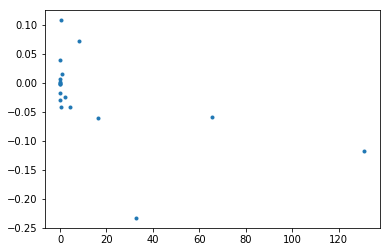

In [182]:
plt.plot(datk2[0],fitb.fun,'.')

In [185]:
datk1 = k1mod(np.array([1.]),ligs,0.05)

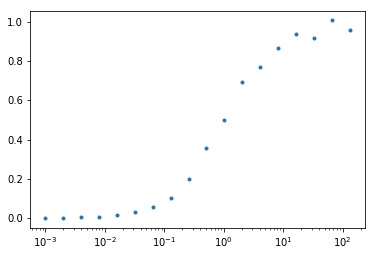

In [186]:
plt.semilogx(datk1[0],datk1[1],'.')

In [195]:
fitted = fit(datk1,k1mod,np.array([3.]))

In [196]:
fitted

 active_mask: array([ 0.])
        cost: 0.0037216650565040006
         fun: array([  1.06649282e-04,  -5.27407627e-05,  -2.23271285e-04,
        -9.07892208e-05,  -9.90218790e-04,  -9.91102959e-04,
         1.69464786e-03,   8.24709373e-03,   3.93340533e-03,
        -2.30509567e-02,   5.72186454e-04,  -2.61134986e-02,
         3.33093103e-02,   2.15602306e-02,   6.46755490e-03,
         5.35813739e-02,  -2.10918540e-02,   3.47754982e-02])
        grad: array([  2.02047575e-11])
         jac: array([[ 0.00099803],
       [ 0.00199214],
       [ 0.00396864],
       [ 0.00787531],
       [ 0.01550704],
       [ 0.03007303],
       [ 0.05663003],
       [ 0.10092698],
       [ 0.16323183],
       [ 0.22615036],
       [ 0.25363421],
       [ 0.22475814],
       [ 0.16142749],
       [ 0.09948317],
       [ 0.05571187],
       [ 0.0295542 ],
       [ 0.01523108],
       [ 0.00773298]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 10
        njev: 9
  optimality:

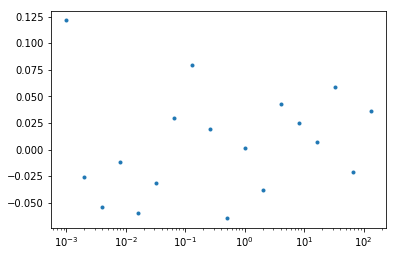

In [206]:
plt.semilogx(datk1[0],fitted.fun/datk1[1],'.')

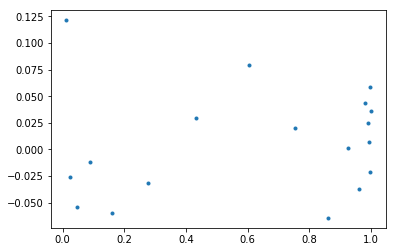

In [209]:
plt.plot(k1mod(fita.x,ligs)[1],fitted.fun/datk1[1],'.')

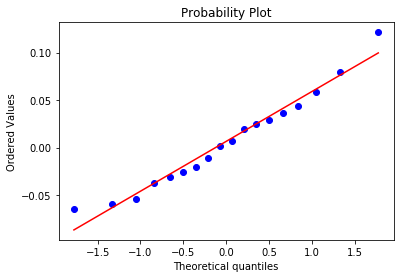

In [224]:
pp = sp.stats.probplot(fitted.fun/datk1[1],plot=plt)

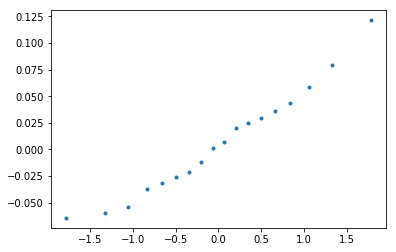

In [221]:
plt.plot(pp[0][0],pp[0][1],'.')

In [215]:
pp[0][1]

array([ -2.61134986e-02,  -2.30509567e-02,  -2.10918540e-02,
        -9.91102959e-04,  -9.90218790e-04,  -2.23271285e-04,
        -9.07892208e-05,  -5.27407627e-05,   1.06649282e-04,
         5.72186454e-04,   1.69464786e-03,   3.93340533e-03,
         6.46755490e-03,   8.24709373e-03,   2.15602306e-02,
         3.33093103e-02,   3.47754982e-02,   5.35813739e-02])

In [225]:
fitted2 = fit(datk1,k2mod,np.array([3.,1.]))

In [226]:
fitted2

 active_mask: array([ 0.,  0.])
        cost: 0.0034271763416231179
         fun: array([ 0.0002166 ,  0.00016623,  0.000211  ,  0.00076328,  0.00066165,
        0.00210009,  0.00711679,  0.01663753,  0.01412503, -0.01566429,
       -0.0002996 , -0.03500282,  0.02211446,  0.01260056,  0.00074699,
        0.05033853, -0.02281997,  0.03388324])
        grad: array([ -4.35159789e-10,  -1.24445889e-09])
         jac: array([[  4.98252565e-04,   2.18494097e-06],
       [  9.93027423e-04,   8.71115481e-06],
       [  1.97224591e-03,   3.46169691e-05],
       [  3.89005954e-03,   1.36673334e-04],
       [  7.56863232e-03,   5.32728387e-04],
       [  1.43384293e-02,   2.02510366e-03],
       [  2.58180857e-02,   7.33883958e-03],
       [  4.23730417e-02,   2.43679490e-02],
       [  5.94432408e-02,   6.97175786e-02],
       [  6.58274831e-02,   1.58990383e-01],
       [  5.37340697e-02,   2.69198589e-01],
       [  3.15559417e-02,   3.27892460e-01],
       [  1.37727150e-02,   2.94660293e-01]

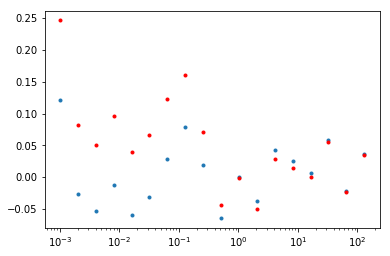

In [228]:
plt.semilogx(datk1[0],fitted.fun/datk1[1],'.')
plt.semilogx(datk1[0],fitted2.fun/datk1[1],'.',color='red')

((array([-1.77709673, -1.33087857, -1.05345661, -0.83977496, -0.6589352 ,
         -0.49749478, -0.34812942, -0.20618578, -0.06829777,  0.06829777,
          0.20618578,  0.34812942,  0.49749478,  0.6589352 ,  0.83977496,
          1.05345661,  1.33087857,  1.77709673]),
  array([ -2.61134986e-02,  -2.30509567e-02,  -2.10918540e-02,
          -9.91102959e-04,  -9.90218790e-04,  -2.23271285e-04,
          -9.07892208e-05,  -5.27407627e-05,   1.06649282e-04,
           5.72186454e-04,   1.69464786e-03,   3.93340533e-03,
           6.46755490e-03,   8.24709373e-03,   2.15602306e-02,
           3.33093103e-02,   3.47754982e-02,   5.35813739e-02])),
 (0.020149216504496678, 0.0050913065655377281, 0.94014026435412901))

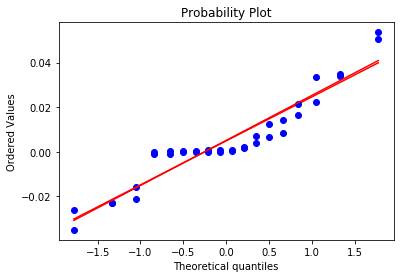

In [233]:
sp.stats.probplot(fitted2.fun,plot=plt)
sp.stats.probplot(fitted.fun,plot=plt)

In [234]:
def k2mod_fix(params,ligs,noise=None):
    '''
    returns tuple of ligand concentrations, saturation, params
    
    params is array of binding constants
    ligs is array of ligand concentrations
    noise is relative percent of gaussian noise (e.g., 0.0-1.) applied to data
    '''
    
    k1 = params[0]
    k2 = params[0]/4
    sat = (1/2)*((k1*ligs + 2*k1*k2*(ligs**2))/(1 + k1*ligs + k1*k2*(ligs**2)))
    
    if noise is None:
        return (ligs,sat)
    else:
        noised = np.random.normal(sat,noise*sat)
        return (ligs,noised,params)

In [241]:
fitted = fit(datk1,k1mod,np.array([3.]))
fitted2 = fit(datk1,k2mod_fix,np.array([3.]))
fitted3 = fit(datk1,k2mod,np.array([3.,3.]))

In [242]:
fitted.x

array([ 0.98565027])

In [245]:
fitted2.x/2

array([ 0.98565027])

In [244]:
fitted3.x

array([ 2.19212713,  0.4403934 ])